<a href="https://colab.research.google.com/github/mpip282n/SegmentasiCitra_Kelompok8/blob/main/segmentasi_diskontinuitas_similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving framepoto.jpg to framepoto.jpg


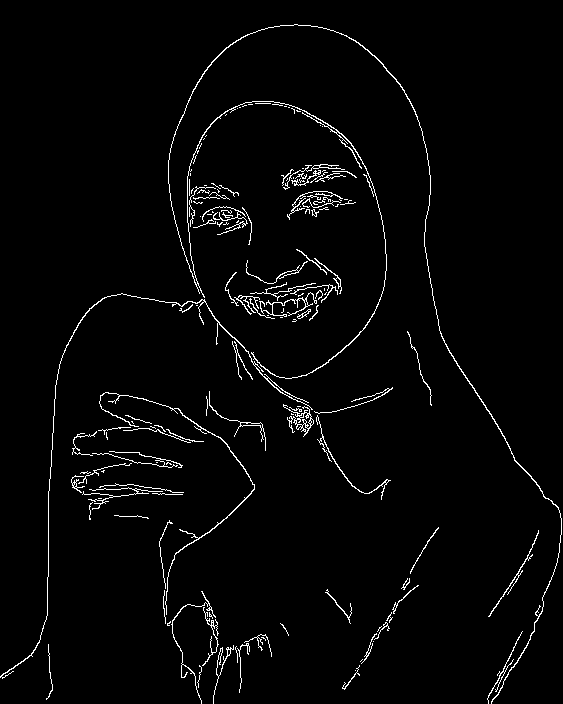

In [ ]:
# Install library yang dibutuhkan
!pip install opencv-python

# Import library
import cv2
import numpy as np
from google.colab import files
from google.colab.patches import cv2_imshow

# Fungsi untuk segmentasi menggunakan metode diskontinuitas (Canny)
def segmentasi_diskontinuitas(image, lower_threshold, upper_threshold):
    # Aplikasikan metode Canny untuk deteksi tepi
    edges = cv2.Canny(image, lower_threshold, upper_threshold)

    # Tampilkan hasil
    cv2_imshow(edges)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Mengunggah gambar
uploaded = files.upload()

# Ambil path gambar dari hasil unggahan
image_path = list(uploaded.keys())[0]

# Tentukan nilai threshold
lower_threshold = 50
upper_threshold = 150

# Baca gambar
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Panggil fungsi segmentasi_diskontinuitas
segmentasi_diskontinuitas(image, lower_threshold, upper_threshold)


Saving framepoto.jpg to framepoto (7).jpg


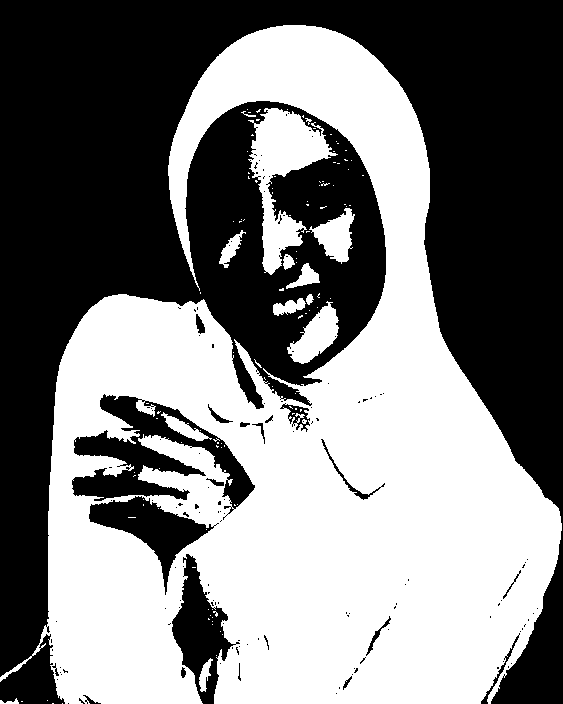

In [ ]:
# Install library yang dibutuhkan
!pip install opencv-python

# Import library
import cv2
import numpy as np
from google.colab import files
from google.colab.patches import cv2_imshow

# Fungsi untuk segmentasi menggunakan metode similarity thresholding
def segmentasi_similarity_thresholding(image, threshold):
    # Ubah gambar ke ruang warna LAB
    lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

    # Ambil saluran L (luminance)
    l_channel = lab_image[:, :, 0]

    # Normalisasi nilai piksel
    l_channel = cv2.normalize(l_channel, None, 0, 255, cv2.NORM_MINMAX)

    # Binarisasi gambar berdasarkan perbedaan warna dengan threshold
    _, segmented = cv2.threshold(l_channel, threshold, 255, cv2.THRESH_BINARY)

    # Tampilkan hasil
    cv2_imshow(segmented)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Mengunggah gambar
uploaded = files.upload()

# Ambil path gambar dari hasil unggahan
image_path = list(uploaded.keys())[0]

# Tentukan nilai threshold
threshold_value = 200  # Sesuaikan sesuai kebutuhan

# Baca gambar
image = cv2.imread(image_path)

# Panggil fungsi segmentasi_similarity_thresholding
segmentasi_similarity_thresholding(image, threshold_value)


Saving framepoto.jpg to framepoto (11).jpg


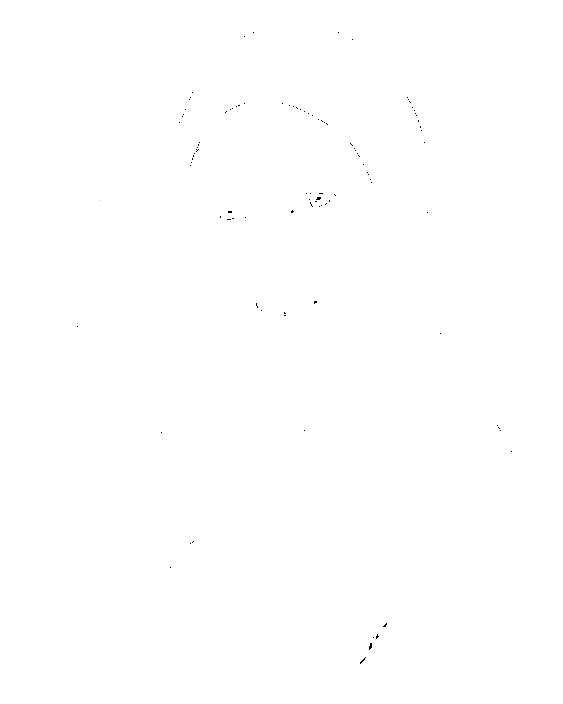

In [ ]:
# Install library yang dibutuhkan
!pip install opencv-python

# Import library
import cv2
import numpy as np
from google.colab import files
from google.colab.patches import cv2_imshow

# Fungsi untuk segmentasi menggunakan metode Region Growing
def region_growing(image, seed):
    # Ambil dimensi gambar
    height, width, _ = image.shape

    # Inisialisasi gambar hasil segmentasi
    segmented = np.zeros((height, width), dtype=np.uint8)

    # Konversi gambar ke ruang warna LAB
    lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

    # Ambil saluran L (luminance)
    l_channel = lab_image[:, :, 0]

    # Normalisasi nilai piksel
    normalized_l_channel = cv2.normalize(l_channel, None, 0, 255, cv2.NORM_MINMAX)

    # Tentukan batas toleransi untuk penambahan piksel ke dalam wilayah
    tolerance = 20

    # Set nilai seed pada gambar hasil segmentasi
    segmented[seed[0], seed[1]] = 200

    # Proses Region Growing
    stack = [seed]

    while stack:
        current_pixel = stack.pop()

        for i in range(-1, 2):
            for j in range(-1, 2):
                x, y = current_pixel[0] + i, current_pixel[1] + j

                # Pastikan koordinat berada dalam batas gambar
                if 0 <= x < height and 0 <= y < width:
                    # Hitung perbedaan nilai piksel
                    diff = abs(int(normalized_l_channel[current_pixel[0], current_pixel[1]]) - int(normalized_l_channel[x, y]))

                    # Periksa apakah piksel memenuhi kriteria kesamaan
                    if segmented[x, y] == 0 and diff < tolerance:
                        segmented[x, y] = 255
                        stack.append((x, y))

    return segmented

# Mengunggah gambar
uploaded = files.upload()

# Ambil path gambar dari hasil unggahan
image_path = list(uploaded.keys())[0]

# Baca gambar
image = cv2.imread(image_path)

# Tentukan seed (koordinat piksel awal)
seed_pixel = (200, 100)  # Sesuaikan sesuai kebutuhan

# Panggil fungsi region_growing
result = region_growing(image, seed_pixel)

# Tampilkan hasil
cv2_imshow(result)
cv2.waitKey(0)
cv2.destroyAllWindows()
